##  VERİ BİLİMİNE GİRİŞ PROJESİ-2

In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Görev 1: Veri Yükleme ve İlk İnceleme

### 1. Veri setini yükleme

In [312]:
df = pd.read_csv("proje_dataset2.csv")
df.columns = df.columns.str.strip()

### 2. İlk 5 ve son 5 satırı görüntüleme

In [313]:
df.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


In [314]:
df.tail()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
907,SONY,Full HD LED,43,44999,57900,Linux,4.4
908,SONY,Full HD LED,40,41499,51900,Linux,4.6
909,SONY,Ultra HD LED,65,149990,184990,Linux,4.3
910,SONY,HD LED,32,32900,32900,Linux,4.4
911,SONY,Full HD LED,43,56900,56900,Linux,4.6


### 3. Sütun isimlerini ve veri tiplerini listeleme

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             912 non-null    object 
 1   Resolution        912 non-null    object 
 2   Size              912 non-null    int64  
 3   Selling Price     912 non-null    int64  
 4   Original Price    912 non-null    int64  
 5   Operating System  901 non-null    object 
 6   Rating            692 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 50.0+ KB


### 4. Temel istatistikleri görüntüleme

In [316]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,912.0,45.942982,12.316492,17.0,32.0,43.0,55.00,85.0
Selling Price,912.0,59358.606360,65866.677856,4849.0,19797.5,36990.0,67064.25,499990.0
Original Price,912.0,81975.213816,84823.568826,6999.0,28990.0,52900.0,99900.00,549990.0
Rating,692.0,4.234104,0.366694,2.0,4.1,4.3,4.40,5.0


### Görev 2: Veri Temizleme

### 1. Eksik değerleri tespit edin ve sayısını bulun

In [ ]:
df.isnull().sum() 

Brand                 0
Resolution            0
Size                  0
Selling Price         0
Original Price        0
Operating System     11
Rating              220
dtype: int64

### 2. Duplicate (tekrarlayan) satırları kontrol edin varsa silin

In [ ]:
duplicate_count = df.duplicated().sum()
print(f"Tekrarlayan satır sayısı: {duplicate_count}") 

df = df.drop_duplicates()
print("Tekrarlayan satırlar silindi")

Tekrarlayan satır sayısı: 30
Tekrarlayan satırlar silindi


### Görev 3: Eksik Veri Doldurma

### 1. Operating System sütunu için: Eksik değerleri en sık geçen işletim sistemi ile doldurma

In [ ]:
en_sik_os = df["Operating System"].mode()[0]

df["Operating System"] = df["Operating System"].fillna(en_sik_os)
df.isnull().sum()

Brand                 0
Resolution            0
Size                  0
Selling Price         0
Original Price        0
Operating System      0
Rating              208
dtype: int64

### 2. Rating sütunu için: Eksik değerleri marka bazında ortalama rating ile doldurma
Markaların kendi ortalamalarını kullanarak daha tutarlı bir doldurma işlemi yapıyoruz. Eğer bir markanın hiç rating'i yoksa genel ortalama kullanılır.

In [320]:
df['Rating'] = df['Rating'].fillna(df.groupby('Brand')['Rating'].transform('mean'))

df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
df.isnull().sum()

Brand               0
Resolution          0
Size                0
Selling Price       0
Original Price      0
Operating System    0
Rating              0
dtype: int64

### Görev 4: Özellik Mühendisliği

### 1. Discount Percentage (İndirim Yüzdesi) sütunu oluşturun

In [321]:
df['Discount Percentage'] = ((df['Original Price'] - df['Selling Price']) / df['Original Price']) * 100
df['Discount Percentage'] = df['Discount Percentage'].round(2)
df.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating,Discount Percentage
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3,30.90
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4,59.23
2,realme,HD LED,32,13999,17999,Android,4.3,22.22
3,Mi,HD LED,32,14999,19999,Android,4.4,25.00
4,realme,HD LED,32,12999,21999,Android,4.3,40.91


### 2. Price Category (Fiyat Kategorisi) sütunu oluşturun
Fiyat aralıklarına göre televizyonları kategorize ediyoruz.

In [322]:
def categorize_price(price):
    if price < 20000:
        return 'Ekonomik'
    elif 20000 <= price < 50000:
        return 'Orta Segment'
    elif 50000 <= price < 100000:
        return 'Premium'
    else:
        return 'Ultra Premium'

df['Price Category'] = df['Selling Price'].apply(categorize_price)
df[['Selling Price', 'Price Category']].head()

,Selling Price,Price Category
0,37999,Orta Segment
1,52999,Premium
2,13999,Ekonomik
3,14999,Ekonomik
4,12999,Ekonomik


### Görev 5: Veri Görselleştirme

### a) En popüler 10 televizyon markasının dağılımı

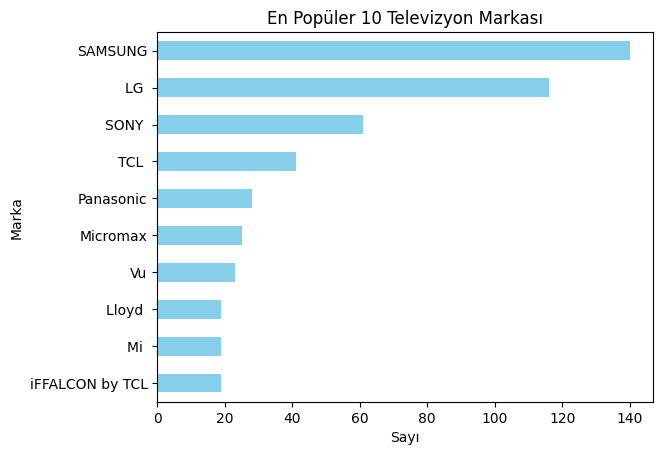

In [323]:
df['Brand'].value_counts().head(10).sort_values().plot(kind='barh', color='skyblue')
plt.title('En Popüler 10 Televizyon Markası')
plt.xlabel('Sayı')
plt.ylabel('Marka')
plt.show()

Grafik incelendiğinde, veri setinde en fazla bulunan markanın **SAMSUNG** olduğu, onu **LG** ve **SONY** gibi markaların takip ettiği görülmektedir. Pazar payının büyük kısmını bu köklü markalar oluşturmaktadır.

### b) Markalara göre ortalama satış fiyatı (En pahalı 10)

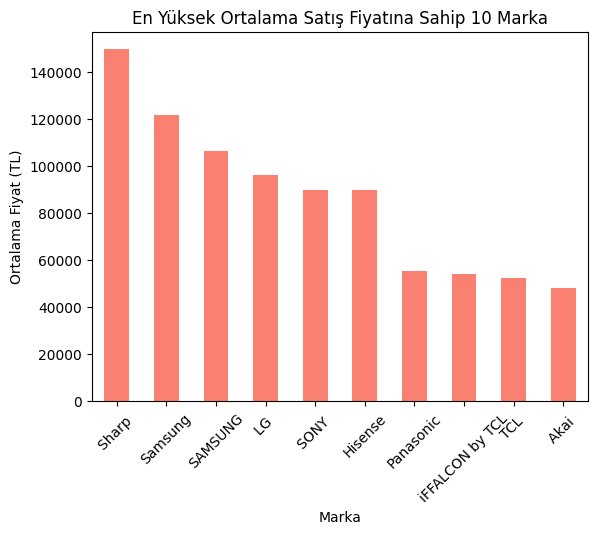

In [328]:
df.groupby('Brand')['Selling Price'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='salmon')
plt.title('En Yüksek Ortalama Satış Fiyatına Sahip 10 Marka')
plt.xlabel('Marka')
plt.ylabel('Ortalama Fiyat (TL)')
plt.xticks(rotation=45)
plt.show()

Grafik incelendiğinde, **Sharp**, **Samsung** ve **Sony** gibi markaların ortalama satış fiyatlarının diğerlerine göre oldukça yüksek olduğu görülmektedir. Bu markalar daha çok Premium ve Ultra Premium segmentte ürünler sunmaktadır.

### c) Markalara göre ortalama rating (En yüksek 10)

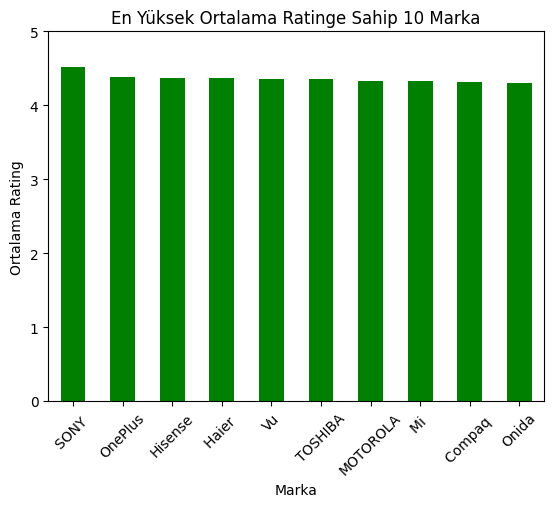

In [325]:
df.groupby('Brand')['Rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title('En Yüksek Ortalama Ratinge Sahip 10 Marka')
plt.xlabel('Marka')
plt.ylabel('Ortalama Rating')
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.show()

Grafik incelendiğinde, kullanıcı memnuniyetinin (Rating) markalar arasında birbirine oldukça yakın olduğu, ancak **Sony** ve **Hisense** gibi markaların biraz daha öne çıktığı görülmektedir.

### d) Ekran boyutuna göre dağılım (Histogram)

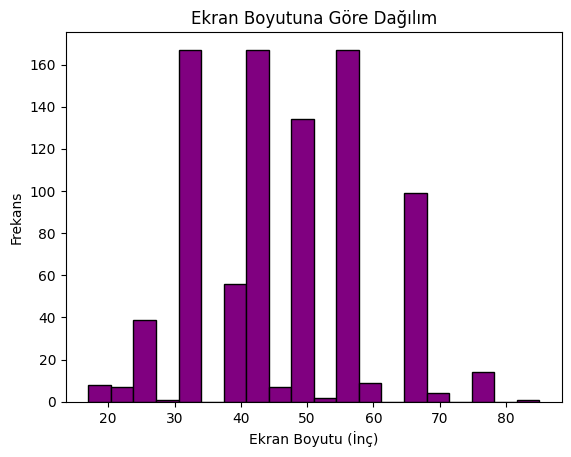

In [326]:
df['Size'].plot(kind='hist', bins=20, color='purple', edgecolor='black')
plt.title('Ekran Boyutuna Göre Dağılım')
plt.xlabel('Ekran Boyutu (İnç)')
plt.ylabel('Frekans')
plt.show()

Histogram incelendiğinde, televizyon ekran boyutlarının yoğunlukla **32 inç**, **43 inç** ve **55 inç** civarında toplandığı görülmektedir. Bu boyutlar, tüketiciler tarafından en çok tercih edilen standart boyutlardır.